# Ejercicio 1
## Enunciado
Genere tres conjuntos de datos de entrenamiento correspondientes al problema de las espirales anidadas de la práctica de python, uno de longitud 150, otro de 600 y un tercero de 3000. Genere un conjunto de test de longitud 10000. A partir de cada uno de los conjuntos de entrenamiento, entrene el árbol de decisión correspondiente y grafique las predicciones sobre el conjunto de test. Comente los resultados.

In [5]:
from Comunes import standardTree
from Generadores import espirales
import numpy as np
import matplotlib.pyplot as plt

In [3]:
testSet = list(espirales(10000)["input"])

sizes = [150, 600, 3000]

trainingSets = []
for sz in sizes:
    trainingSets.append(espirales(sz))

classifiers = []
for i in range(len(trainingSets)):
    classifiers.append(standardTree())


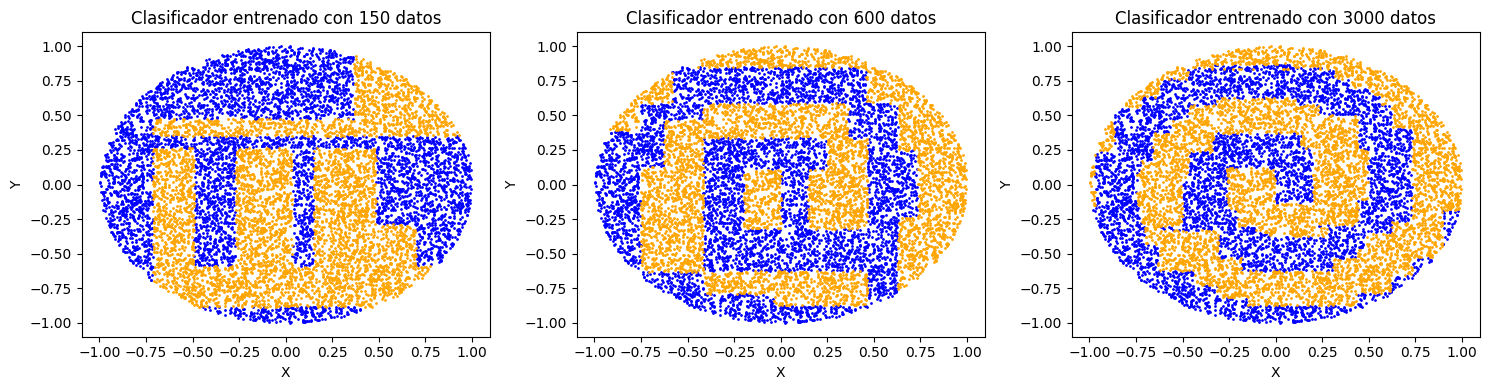

In [6]:
# Entrenamos cada clasificador
for i in range(3):
    classifiers[i].fit(list(trainingSets[i]["input"]), list(trainingSets[i]["output"]))

# Y plotteamos
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
for i, trainingSet in enumerate(trainingSets):

    # Predecimos sobre el conjunto de testeo
    predict = classifiers[i].predict(testSet)

    # Nos quedamos con las componentes de los clase 0
    x0 = np.array([e[0] for (i,e) in enumerate(testSet) if predict[i] == 0])
    y0 = np.array([e[1] for (i,e) in enumerate(testSet) if predict[i] == 0])

    # Y las componentes de los clase 1
    x1 = np.array([e[0] for (i,e) in enumerate(testSet) if predict[i] == 1])
    y1 = np.array([e[1] for (i,e) in enumerate(testSet) if predict[i] == 1])

    # Y plotteamos en el subplot correspondiente
    axes[i].scatter(x0, y0, color = "blue", s = 1)
    axes[i].scatter(x1, y1, color = "orange", s = 1)

    # Detalles del plot
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].set_title(f'Clasificador entrenado con {sizes[i]} datos')

plt.tight_layout()
plt.show()

### Comentarios sobre los resultados.

Es claro que conforme aumentamos la cantidad de datos de entrenamiento el clasificador muestra un mejor desempeño.